## Final Project Submission

Please fill out:
* Student name: Masinde Victor Kiprono
* Student pace: Full time
* Instructor name: Maryann Mwikali



# Project Overview

This project deals with a company that wants to venture into another business sos as to expand their portfolio.The company is intrested in avition, specifically an entreprise that purchases planes and use them for commercial and private purposes. They however do not know the risks that are associated with this type of business and that hinders their decision making. My project is aimed at looking into the risks associated with operating this type of business that will give actionable insights for them to make a decision.

## Import The Necessary Libraries to Notebook

For this project, I am going to use data that has already been collected and stored in kaggle. The data is stored in **csv format (Aviation_Data.csv)**. I will import the necessary libararies that will enable me read my data from the csv file. I will also import other libraries that will be of help to me in editing my data and visualizing it. **Pandas** is crucial for creating my dataframes so as to see the structure of my data. **Numpy** will come in handy when I need to fast and precise statistical calculations. I will import **Matplotlib** to help me visualize my findings in form of graphs.

In [39]:
# Your code here - remember to use markdown cells for comments as well!
#Importing the necessary libraries 
#I will use the %matplotlib inline command to help show plots inside my notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




## Import The Data

I will use the Libraries above to read the contents of the csv file in folder named data to my notebookm in preparation for analysis. Pandas is ideal for doing this since it has built in functions to read into files. I will create a variable **'df'** where I will save my data. After saving the data inside my variable, I will go ahead and check the structure of our data by calling **df.head()** which shows us the preview of our data.It returns the first five rows of our dataframe since we imported our data in form a dataframe.

In [2]:
#Import data using pandas
#save it to a variable 
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Understanding

The preview above gives me a slight picture of how my data looks like. I can see what to expect when I start to dog deeper into the data. For me to get full insight on what this data contains, I will have to check using a function in pandas, **.info()**. To know the length and the width of my data, I will use the **.shape** function.This step is crucial for me as it builds base for the next step which is data cleaning. At this point we can be able to see the names of all columns, the type of data the column carries and the number of non null values.

In [3]:
#Check the shape of the data
df.shape

(90348, 31)

In [4]:
#Check the detailed information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
#Our dataframe contains continous data
#Lets see the statistical summary of this data
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [6]:
df['Aircraft.Category'].unique()
#fill using mode

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

## Data Cleaning
 
 When doing our analysis, we deal with data that is only relevant to us and in this case we will major to columns that give us relevant information on risks associated with airplane business. From the data information above, we see that there is missing data in some columns, this is normally denoted by **'NaN'**. We also need to check for duplicates and whitespaces in our data and deal with them accordingly if they exist.

### Create a copy of data.
Before I start to manipulate my data, I want to make a copy of the original data. For my dataframe manipulations, I will be making use of the **inplace=True** parameter instead of creating an new variable everytime. This is effecient for me and my data remains clean and neat. Using the inplace=True manipulates our dataframe directly and does not leave an original copy. I will therefore make a copy just icase I need to refer to my original data at a later stage.

In [7]:
df_copy=df.copy()

#### Checking and dropping duplicates

In [8]:
#Check for duplicates
df.duplicated().sum()

1390

In [9]:
#Remove duplicate rows
df.drop_duplicates(inplace=True)

In [10]:
#Confirm if the rows have been dropped.
#Check for dataframe shape and inspect the number of rows
df.shape

(88958, 31)

#### Drop the unnessary columns
Every column in our dataframe contains important pieces of information but for our analysis we will only focus on those which are relevant to us. Therefore we are going to drop columns that we won`t need for our project.

In [11]:
#Drop irrelevant columns to our survey.
df.drop(columns=['Latitude', 'Longitude', 'Airport.Code', 'FAR.Description','Schedule', 'Accident.Number', 'Event.Date'], inplace=True)

In [12]:
#Confirm that the columns have been dropped.
df.shape

(88958, 24)

#### Check for null values

From the general information above, we could see that there are some columns with missing values. Missing values can hinder our data analysis due to presence of gaps in the data. We therefore need to check for nulls and handle them by either **dropping** them or **filling** them using the **mean, median** or manual filling with **specific values**.


In [13]:
#Check for null values in each column.
df.isnull().sum()

Event.Id                     69
Investigation.Type            0
Location                    121
Country                     295
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: int64

### Filling missing data
#### continous data
For continous data, I want to fill the null values with the means in those columns. Here I will use the **.fillna** method

In [14]:
#Replace NaN values with mean of the columns.
df.fillna(df.mean(), inplace=True)
df.head()

,Event.Id,Investigation.Type,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,"MOOSE CREEK, ID",United States,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,...,Personal,NaN,2.0,0.000000,0.000000,0.00000,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,"BRIDGEPORT, CA",United States,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,...,Personal,NaN,4.0,0.000000,0.000000,0.00000,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,"Saltville, VA",United States,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,...,Personal,NaN,3.0,0.279881,0.357061,5.32544,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,"EUREKA, CA",United States,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,...,Personal,NaN,2.0,0.000000,0.000000,0.00000,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,"Canton, OH",United States,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,...,Personal,NaN,1.0,2.000000,0.357061,0.00000,VMC,Approach,Probable Cause,16-04-1980


In [15]:
#Confirm if the NaN values have been replaced by mean.
#Re run the code you used to check for null values above.
df.isnull().sum()

Event.Id                     69
Investigation.Type            0
Location                    121
Country                     295
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines             0
Engine.Type                7146
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: int64

We have successfully replaced null values with data that we can work with. I chose to replace my null values with mean because mean tends to give me what inputs are common in my data. Using the common elements in my data for place of missing data was the go to choice. As we can see above, the columns that had continous data now have no missing data.

#### Categirocal data
There are columns with large amounts of missing values. This makes our column to be irrelevant for our data anylsis as it will not provide enought data to use in drawing reasonable insights. In some Cases, the columns may have null values, but those that are provided can help us in drawing a specific conclusion. In such a case, we fill the null values to avoid gaps in our data before we proceed.For my case, I will replace the NaN values with a placeholder named **"Unkown"**. This is because if I replaced by the Modes in the column, it might introduce a bias to my data and give me wrong visualiations when I plot figures like Histograms.

In [16]:
#Replace null values in our categorical columns with "Unknown
df.fillna('Unkown', inplace=True)

In [17]:
#Confirm if the NaN values have been replaced by placeholder
#Re run the code you used to check for null values above
df.isnull().sum()

Event.Id                  0
Investigation.Type        0
Location                  0
Country                   0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

#### Replacing wrongly recorded data
Sometimes data can be recorded wrongly and we end up getting two instances of the same data when we call for value counts in a column, we can correct this by correcting the wrong recording with the correct format.


In [18]:
#Replace wrongly recorded 'Unkown' with 'Unknown'
#Replace 'none' with 'None'
df.replace('Unkown', 'Unknown', inplace=True)
df.replace('none', 'None', inplace=True)

## Explolatory Data Analysis
In this level, we go deeper and inspect our data using visualitions and grouping them together. This helps us to understand the relationship between different data. Since we are dealing with airplane risks, I will group my data using the different airplane categories to see how each is exposed to accidents.

## Groupby()
In this section we are going to deal with data as pairs and try to understand their relationships. Since I am aiming at emerging with a business idea that has the lowest risk, I will go with the **'Total.Uninjured'** column which has passengers who were safe from accidents.

### Group by Model
I want to check how the model of the plane affects the safety of passengers incase of an accident. After plotting a bar graph, we find that model **MD 83** has the highest number of uninjered passengers.This is the Model with the least risks.

In [19]:
#Group your data by Models
grouped_model=df[df['Aircraft.Category']=='Airplane'].groupby('Model')['Total.Uninjured'].mean()
grouped_model=grouped_model.sort_values(ascending=False)[:10]
grouped_model

Model
MD 83         501.0
777-2Q8       403.0
A340 - 300    397.0
747-451       394.0
DC-10-30F     393.0
747 - 400     383.0
777 222       378.0
A330 - 301    365.0
757-351       352.0
L-1011-385    339.0
Name: Total.Uninjured, dtype: float64

In [20]:
#Check my index
grouped_model.index[:10]

Index(['MD 83', '777-2Q8', 'A340 - 300', '747-451', 'DC-10-30F', '747 - 400',
       '777 222', 'A330 - 301', '757-351', 'L-1011-385'],
      dtype='object', name='Model')

In [21]:
#Check my values
grouped_model.values[:10]

array([501., 403., 397., 394., 393., 383., 378., 365., 352., 339.])

After grouping our data, we do a vissualization to see the relationship of the data that we end up with. Visualizations help someone quickly understand your analysis

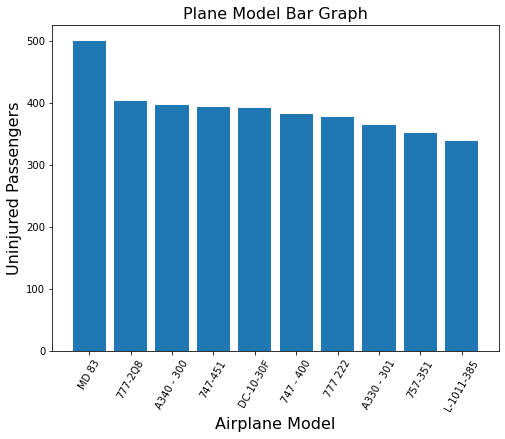

In [46]:
#Plot visualisation
fig, ax= plt.subplots(figsize=(8,6))
ax.bar(x=grouped_model.index[:10], height=grouped_model.values[:10])
plt.xticks(rotation=60)
plt.xlabel('Airplane Model',fontsize=16)
plt.ylabel('Uninjured Passengers',fontsize=16)
plt.title('Plane Model Bar Graph',fontsize=16);

### Group by Air.carrier
We can also check and see how adifferent Air carriers can affect the rate at which passengers remain uninjured incase of an incident or accident. After visualization below,we find that the **'Singapore Airlines, Ltd'** has the highest number of uninjered passengers.This is the Air carrier with the least risks.

In [47]:
#group data by Air.carrier
grouped_Engine_Type=df[df['Aircraft.Category']=='Airplane'].groupby('Air.carrier')['Total.Uninjured'].mean()
grouped_Engine_Type=grouped_Engine_Type.sort_values(ascending=False)[:10]
grouped_Engine_Type

Air.carrier
Singapore Airlines, Ltd.                         588.0
Nordwind                                         455.0
Aerolineas Argentinas S.A.                       397.0
EVA Airways                                      383.0
QANTAS AIRWAYS LIMITED                           365.0
Nokscoot Airlines                                352.0
Azurair Airlines                                 348.0
Executive Airlines Inc. (dba: American Eagle)    339.0
CATHAY PACIFIC AIRWAYS LIMITED                   326.0
Jetstar                                          320.0
Name: Total.Uninjured, dtype: float64

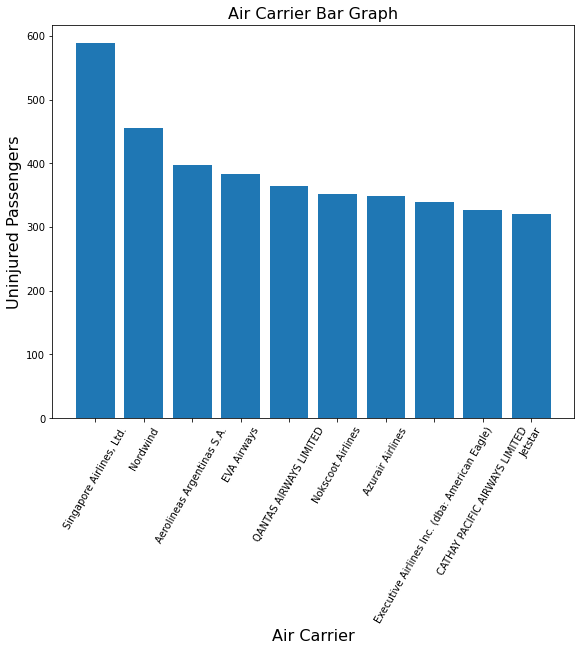

In [24]:
#Plot Visualization
fig, ax= plt.subplots(figsize=(8,6))
ax.bar(x=grouped_Engine_Type.index[:10], height=grouped_Engine_Type.values[:10]);
plt.tight_layout()
plt.xticks(rotation=60)
plt.xlabel('Air Carrier',fontsize=16)
plt.ylabel('Uninjured Passengers',fontsize=16)
plt.title('Air Carrier Bar Graph',fontsize=16);

### Group by Number of Engines
In the next step, we go further and look at the effect that the number of engines in an aircracft affects the number of passengers injured. Here **there is no linear relationship**. When doing our reccomendations we will leave out this column as it does not help us make an informed decison. The scatter plot below shows that there is no relationship between the two variables.

In [48]:
#Group data by Number.of.Engines
grouped_n_Engines=df[df['Aircraft.Category']=='Airplane'].groupby('Number.of.Engines')['Total.Uninjured'].mean()
grouped_n_Engine=grouped_n_Engines.sort_values(ascending=False)
grouped_n_Engine

Number.of.Engines
3.000000    90.362069
4.000000    70.938128
0.000000    26.850098
2.000000    24.888283
1.146585    17.763380
1.000000     1.214203
8.000000     0.000000
6.000000     0.000000
Name: Total.Uninjured, dtype: float64

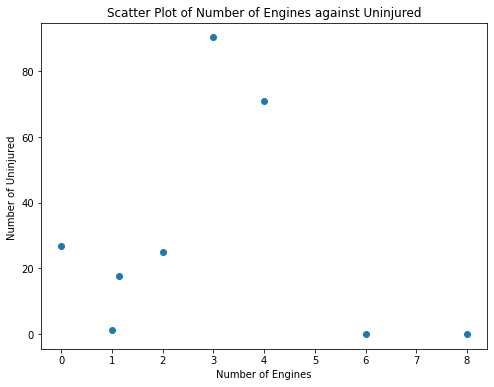

In [26]:
#Plot Visualization
x=grouped_n_Engine.index
y=grouped_n_Engine.values
fig, ax=plt.subplots(figsize=(8,6))
ax.scatter(x,y)
plt.xlabel('Number of Engines')
plt.ylabel('Number of Uninjured ')
plt.title('Scatter Plot of Number of Engines against Uninjured');

### Group by Purpose of Flight
We go further and ivestigate how grouping planes by the purpose of flight affects the rate of passengers being injured in an incident or accident.The business that we want to venture in, is intrested in Executive/corporate and Public Aircraft. These two fall under the category of aircrafts with low risks in that they perfom well in the number of players uninured.

In [27]:
#Group data by Purpose of flight
purpose=df[df['Aircraft.Category']=='Airplane'].groupby('Purpose.of.flight',)['Total.Uninjured'].mean()
purpose=purpose.sort_values(ascending=False)[:10]
purpose

Purpose.of.flight
Unknown                      31.480101
Skydiving                     4.086974
Executive/corporate           3.701516
Air Race/show                 3.614537
Public Aircraft               3.417503
Other Work Use                1.912853
Flight Test                   1.778342
Business                      1.696190
Public Aircraft - Federal     1.685386
Positioning                   1.383099
Name: Total.Uninjured, dtype: float64

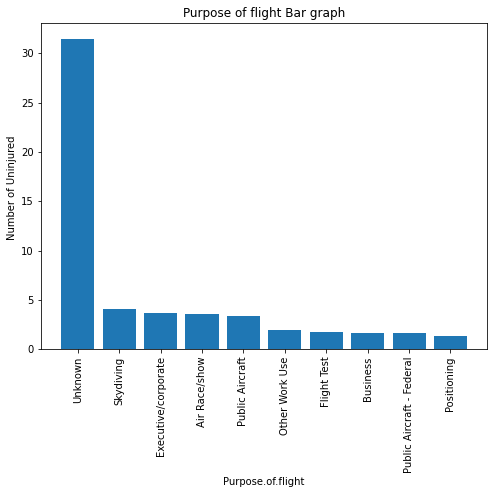

In [57]:
#Plot Visualization
fig, ax=plt.subplots(figsize=(8,6))
ax.bar(purpose.index, purpose.values)
plt.xticks(rotation=90)
plt.xlabel('Purpose.of.flight')
plt.ylabel('Number of Uninjured ')
plt.title('Purpose of flight Bar graph');

### Groupby by Engine Type
Differnt Planes run on different engine types and they can sometimes affect the occurence and magnitude of accidents. From our Bar graph below, we see that **passengers are more likelky to be safe in planes with a Turbo fan as compared to other planes**. In our bar graph it has the highest number who were uninjured.

In [58]:
#Group data by Engine Type
engine_type=df[df['Aircraft.Category']=='Airplane'].groupby('Engine.Type',)['Total.Uninjured'].mean()
engine_type=engine_type.sort_values(ascending=False)[:10]
engine_type

Engine.Type
Turbo Fan          73.083359
Turbo Jet          40.879597
Unknown            15.363091
Geared Turbofan    10.083333
Turbo Shaft         3.179665
Turbo Prop          3.158290
Reciprocating       1.245807
Electric            0.400000
UNK                 0.000000
Name: Total.Uninjured, dtype: float64

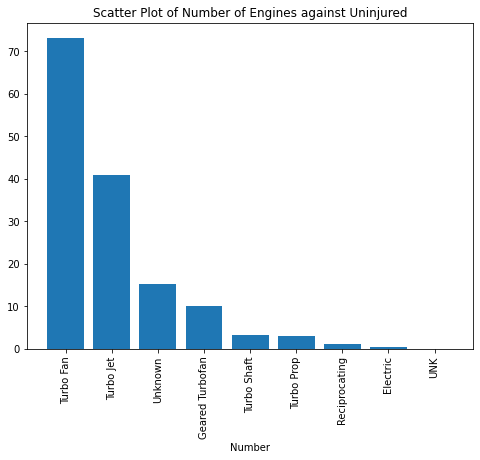

In [30]:
#Plot Visualization
fig, ax=plt.subplots(figsize=(8,6))
ax.bar(engine_type.index, engine_type.values)
plt.xticks(rotation=90)
plt.xlabel('Number')
plt.title('Scatter Plot of Number of Engines against Uninjured');

### Group by Injury Severity
Injury severity has been grouped into different levels depending on the magnitude of the accident. We take this and compare it with our total uninjured passengers. From the visualization, the highest number of passengers that were not injured fall in the category of **Fatal(18) **.

In [59]:
#Group data by Injury severity
injury=df[df['Aircraft.Category']=='Airplane'].groupby('Injury.Severity',)['Total.Uninjured'].mean()
injury=injury.sort_values(ascending=False)[:10]
injury

Injury.Severity
Fatal(18)     261.000000
Incident       44.150478
Fatal(11)      13.000000
Serious         8.141732
Non-Fatal       7.532952
Fatal(154)      7.000000
Fatal(13)       5.662720
Fatal(10)       5.325440
Fatal(160)      5.325440
Fatal(19)       5.325440
Name: Total.Uninjured, dtype: float64

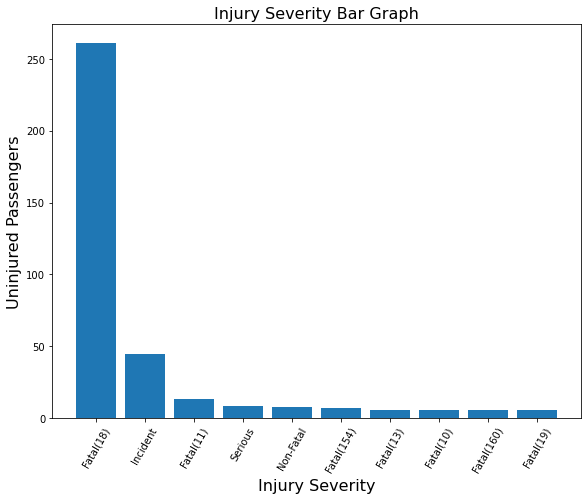

In [54]:
#Plot Visualization
fig, ax= plt.subplots(figsize=(8,6))
ax.bar(x=injury.index[:10], height=injury.values[:10]);
plt.tight_layout()
plt.xticks(rotation=60)
plt.xlabel('Injury Severity',fontsize=16)
plt.ylabel('Uninjured Passengers',fontsize=16)
plt.title('Injury Severity Bar Graph',fontsize=16);